# Reverberation Time computation

PyAmbIR offers 2 functions to compute reverberation time. Both based on `pyroomacoustics`.

- `get_reverberation_time`
- `get_reverberation_time_per_octave`

In this notebook, we will show a small example script to compute reverberation time and represent computed data using `matplotlib` and `pandas`.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from ambir import reverberationTime

Here is a function use to compute and plot global reverberation time and reverberation time per octave:

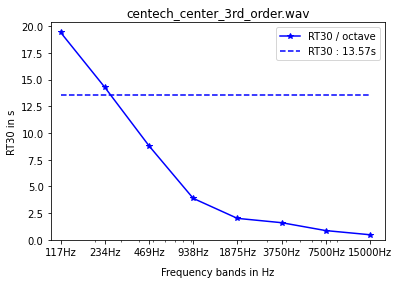

In [13]:
def plot_RT(f_RIR):
    RT30 = reverberationTime.get_reverberation_time(f_RIR, decay_db=30)
    RT30_per_octave, FREQ_BANDS = reverberationTime.get_reverberation_time_per_octave(f_RIR, decay_db=30)

    # filter results
    for i, rt in enumerate(RT30_per_octave):
        if rt > RT30 * 2:
            RT30_per_octave[i] = None

    plt.title(f_RIR.split("/")[-1])
    plt.ylabel("RT30 in s")
    plt.xlabel("Frequency bands in Hz", labelpad = 10)
    plt.semilogx()
    plt.plot(FREQ_BANDS, RT30_per_octave,
             "-b*",
             label=f"RT30 / octave")
    plt.plot(FREQ_BANDS, [RT30]*8,
             "--b",
             label=f"RT30 : {RT30:.2f}s")
    plt.legend()
    plt.ylim(ymin=0)
    plt.xlim(xmin=100)
    plt.xticks(ticks=FREQ_BANDS, labels=[f"{fHz:.0f}Hz" for fHz in FREQ_BANDS])
    plt.show()
    plt.close()
    
    resultPd = pd.DataFrame({'Freq':FREQ_BANDS, 'RT30':RT30_per_octave})
    return resultPd, RT30

res, RT30 = plot_RT("centech_center_3rd_order.wav")

In this code block, we show how to take advantage of `pandas` data formating:

In [14]:
def rejectRT(cell_value):
    highlight = 'background-color: red;'
    default = ''
    if cell_value > RT30:
        return highlight
    return default

(res.style
    .hide_index()
    .format({"Freq":"{:.0f} Hz", "RT30":"{:.02f}s"})
    .applymap(rejectRT, "RT30")
    )

And a last usefull trick from `pandas`, outputing data directly in latex format:

In [15]:
print(res.to_latex())

\begin{tabular}{lrr}
\toprule
{} &        Freq &       RT30 \\
\midrule
0 &    117.1875 &  19.406417 \\
1 &    234.3750 &  14.267083 \\
2 &    468.7500 &   8.794667 \\
3 &    937.5000 &   3.878917 \\
4 &   1875.0000 &   2.007167 \\
5 &   3750.0000 &   1.601875 \\
6 &   7500.0000 &   0.863042 \\
7 &  15000.0000 &   0.474000 \\
\bottomrule
\end{tabular}

